In [1]:
import pandas as pd
import numpy as np

In [2]:
from scipy.stats import chi2
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
DoF = 5

In [4]:
p_value = 1- stats.chi2.cdf(4.8, DoF)

In [5]:
np.round(p_value,2)

0.44

#### 주사위 던지기 실헙
공정한 주사위일 경우, 주사위를 60번 던졌을때 6이 나올 횟수는 10번

In [6]:
import random

In [7]:
def rolldie():
    one = 0;two = 0;three = 0; four = 0; five = 0; six = 0
    
    for i in range(60):
        roll = random.choice([1,2,3,4,5,6])
        if roll == 1:
            one = one + 1
        elif roll == 2:
            two = two + 1
        elif roll == 3:
            three = three + 1
        elif roll == 4:
            four = four + 1
        elif roll == 5:
            five = five + 1
        elif roll == 6:
            six = six + 1
            
    return [one, two, three, four, five, six]

In [8]:
die = rolldie()

In [9]:
die

[15, 9, 9, 8, 13, 6]

### 실제 주사위를 던졌을때 6이 13번 나왔을때 이 주사위는 공정한 주사위 인가?

각 숫자가 나올 평균 횟수

In [10]:
60*1/6

10.0

각 숫자가 나올 횟수의 표준 오차

In [11]:
np.sqrt((1/6) * (5/6)) * np.sqrt(60)

2.886751345948129

실제 차이

In [12]:
(die[3] -10)

-2

In [13]:
distance = (((die[0] -10)**2)+((die[1] -10)**2)+((die[2] -10)**2)+((die[3] -10)**2)+((die[4] -10)**2)+((die[5] -10)**2))/10

In [14]:
distance

5.6

In [15]:
def simulate(n):
    chi2 = []
    for i in range(n):
        die = rolldie()
        distance = (((die[0] -10)**2)+((die[1] -10)**2)+((die[2] -10)**2)
                    +((die[3] -10)**2)+((die[4] -10)**2)+((die[5] -10)**2))/10
        chi2.append(distance)
    return(chi2)      


In [16]:
simulate(10)

[3.8, 3.4, 2.0, 10.4, 12.0, 2.4, 3.8, 5.0, 2.0, 3.6]

<function matplotlib.pyplot.show(close=None, block=None)>

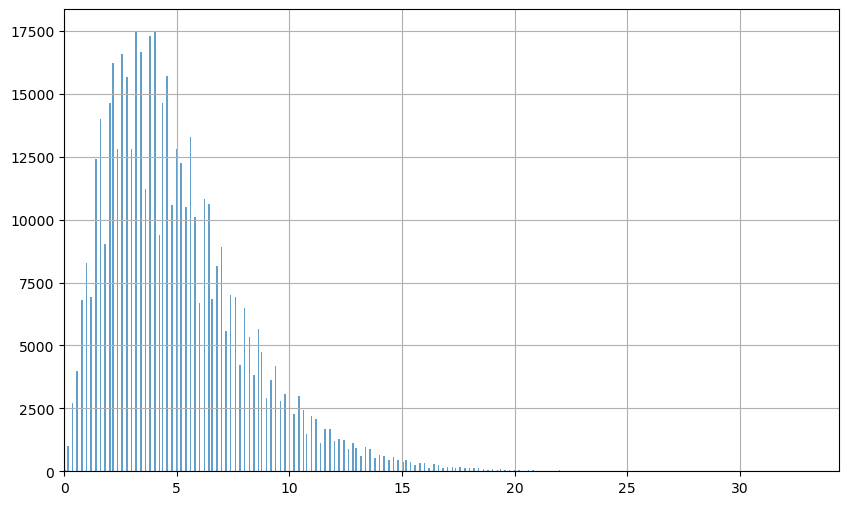

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
x = simulate(500000)
ax.hist(x, alpha=0.7, bins=500)
ax.set_xlim(0, max(x))
ax.grid()
plt.savefig("카이스퀘어분포01.png", dpi=150, bbox_inches='tight')
plt.show

In [18]:
np.percentile(x, 95)

11.0

In [19]:
DoF = 5 # 자유도 5,  자유도 = 카이스쿼에안에 포함된 항의 갯수 - 1
stats.chi2.cdf(11.0, DoF)

0.9486200165169305

In [22]:
p_value = 1- stats.chi2.cdf(11.2, DoF)

In [23]:
p_value

0.0475556439647048